In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('50_Startups.csv')
df = df.rename(columns=lambda x: x.strip())
df = df.dropna()
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


C:\Users\nivet\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='R&D Spend', ylabel='Profit'>

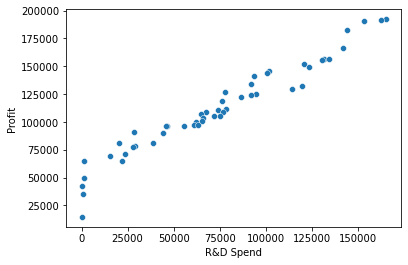

In [3]:
sns.scatterplot(df["R&D Spend"], df["Profit"])

In [4]:
x = df['R&D Spend']
y = df['Profit']

In [5]:
N = len(x)
x_mean = x.mean()
y_mean = y.mean()    
B1_num = ((x - x_mean) * (y - y_mean)).sum()
B1_den = ((x - x_mean)**2).sum()
B1 = B1_num / B1_den    
B0 = y_mean - (B1*x_mean)    
reg_line = 'y = {} + {}x'.format(B0, round(B1, 3))

In [6]:
num = (N * (x*y).sum()) - (x.sum() * y.sum())
den = np.sqrt((N * (x**2).sum() - x.sum()**2) * (N * (y**2).sum() - y.sum()**2))
R = num / den

In [7]:
print('Regression Line: ', reg_line)
print('Correlation Coef.: ', R)
print('"Goodness of Fit": ', R**2)

Regression Line:  y = 49032.89914125214 + 0.854x
Correlation Coef.:  0.9729004656594841
"Goodness of Fit":  0.946535316080441


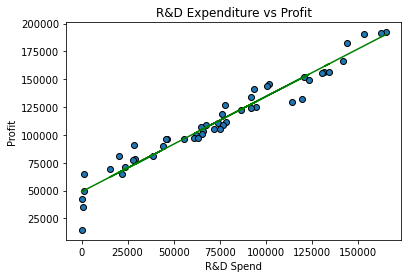

In [8]:
plt.scatter(x, y, edgecolor='black')
plt.title('R&D Expenditure vs Profit')
plt.xlabel('R&D Spend')
plt.ylabel('Profit')
plt.plot(x, B0 + B1*x, c = 'g')